In [7]:
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram

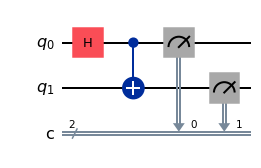

In [8]:
circuit = QuantumCircuit(2, 2)

circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0, 1], [0, 1])

circuit.draw(output='mpl')

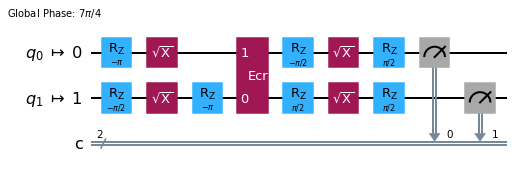

In [9]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
backend = service.least_busy(simulator=False, operational=True)

sampler = Sampler(mode=backend)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)

isa_circuit.draw("mpl", idle_wires=False)

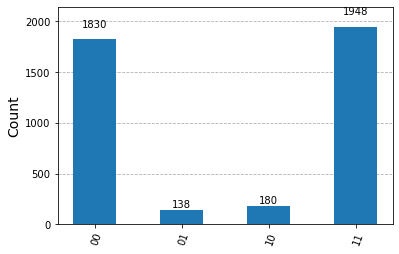

In [10]:
job = sampler.run([isa_circuit])
result = job.result()
pub_result = result[0]

plot_histogram(pub_result.data.c.get_counts())

#wurde bereits in anderem Notebook festgesetzt
#QiskitRuntimeService.save_account(token=open("ibmapi.txt", "r").read(), channel="ibm_quantum")